# ML7Assign Machine Learning - Regression or Classification?

### In this assignment, we will approach **FinishedArea** from two perspectives: **Regression and Classification**. As we saw previously, we can certainly consider regression models, but classification poses a problem. To consider classification we must create a way to **categorize** properties in a way that makes sense for FinishedArea. 

### We will create a new column in houses_2017 entitled **'SMLXL'** for small, medium, large, and extra large. We can then explore this same target with two different types of ML models. 

### Clearly we are not attempting to solve pressing real world problems with these 'Challenges', but what is of importance here is the opportunity to ask questions, and make conjectures about data, and see how the data can be explored in ways that may not be immediately apparent.

In [1]:
# Upload the Nashville Housing data files from GitHub
! git clone https://github.com/gacree/NashvilleHousing.git

Cloning into 'NashvilleHousing'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


Import packages, read data into dataframes, reassign column names



In [1]:
#import the pandas package for data analytics
# and matplotlib for visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read the data files into pandas dataframes.
# Notice that we must indicate the full path of the data file.
houses_2017 = pd.read_csv('NashvilleHousing/2017SINGLEFAMILYSF.txt')

# Note: For the purpose of scaling down our data to more clearly explore our 
# machine learning models, we now severely restrict our dataframe

houses_2017 = houses_2017[(houses_2017['AddressCity']== 'MADISON')\
                          | (houses_2017['AddressCity']== 'BRENTWOOD')]#.sample(500)                          

# Alter the column names in each of the new dataframes
houses_2017.columns = ['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea']

### Let's create houses_2017['SMLXL']

In [2]:
# 1
# First let's determine (or describe ... hint, hint, hint) the basic statistics of houses_2017['FinishedArea']
houses_2017['FinishedArea'].describe()

count    14754.000000
mean      1877.961240
std       1029.561187
min          0.000000
25%       1170.000000
50%       1595.000000
75%       2331.500000
max      14199.000000
Name: FinishedArea, dtype: float64

In [3]:
# 2
# We will use the min, 25%, 50%, 75%, and max to derive our categories.
# One fourth of our properties will thus be in each of the categories S, M, L, and XL.

# Since sklearn requires numerical data, we will use 0 for S, 1 for M, 2 for L, and 3 for XL.

# Define the new column and set initial values = 3
# Notice: This labels all the properties as XL.
houses_2017['SMLXL'] = 3

# Make the following changes to set all the properties correctly.
houses_2017.loc[houses_2017['FinishedArea'] <= 1170,'SMLXL'] = 0
houses_2017.loc[(houses_2017['FinishedArea'] <= 1595) & (houses_2017['FinishedArea'] > 1170),'SMLXL'] = 1
houses_2017.loc[(houses_2017['FinishedArea'] <= 2331) & (houses_2017['FinishedArea'] > 1595),'SMLXL'] = 2
houses_2017.loc[houses_2017['FinishedArea'] > 2331,'SMLXL'] = 3

# View a sample of 10 rows of the 'FinishedArea' and 'SMLXL' of houses_2017
houses_2017[['FinishedArea','SMLXL']].sample(10)

# Do the assignments of 'SMLXL' line up as you would expect???
# Your comments here ... ???
# Yes, they do.

,FinishedArea,SMLXL
17791,1450.00000,1
186145,3075.00000,3
19788,1471.00000,1
17784,1445.42505,1
10795,1472.00000,1
11644,1492.00000,1
11482,1674.40002,2
12329,1050.00000,0
168134,2359.50000,3
22149,1642.00000,2


In [34]:
# Note: This cell does exactly the same as the cell above using a loop
# and the .quantile function ... rather than needing to know the values to use.
# It is only for your consideration and/or to execute if you have trouble with the cell above.

# We will use the min, 25%, 50%, 75%, and max to derive our categories.
# One fourth of our properties will thus be in each of the categories S, M, L, and XL.

# Since sklearn requires numerical data, we will use 0 for S, 1 for M, 2 for L, and 3 for XL.

# Define the new column and set initial values = 3
houses_2017['SMLXL'] = 3

# Create a loop setting smaller properties equal to smaller values
q = .75
for i in range(2,-1,-1):
  houses_2017.loc[houses_2017['FinishedArea']<=houses_2017['FinishedArea'].quantile(q),'SMLXL']=i
  q -= .25

# View a sample of 10 rows of the 'FinishedArea' and 'SMLXL' of houses_2017
houses_2017[['FinishedArea','SMLXL']].sample(10)

houses_2017['SMLXL'].value_counts()

1    3708
0    3698
3    3688
2    3660
Name: SMLXL, dtype: int64

'# 3'
### Let's first use our Regression models to determine which size properties might be more easily predicted by LAND and IMPR.

### Which do you think will be predicted with the greater accuracy?
S, M, L, or XL?

XL

### Which do you think will be predicted with the least accuracy?
S, M, L, or XL?

L

### Explain your reasoning.
XL has least bounded requirements whereas L has lowest number of datapoints.
...

## Let's step through the process for applying a machine learning Regression model to our dataset.



### 1) Choose the Features and a Target for your problem.

## Note: You should step through this process FOUR times. Once for each value of houses_2017['SMLXL'] ... in order to check out your conjectures from above.


In [63]:
# 4 
# See the NOTE above. The first time through, simply execute the cell.
# The following 3 times you will need to make simple changes to the value of 
# houses_2017['SMLXL']

# Features
X = houses_2017.loc[houses_2017['SMLXL']==3,['LAND','IMPR']]

# Target
y = houses_2017.loc[houses_2017['SMLXL']==3,'FinishedArea']

### 2) Create Training and Testing sets

In [64]:
# import the package to create the Training and Testing split.
from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 
# Since test_size=0.30, the split will be 70% Training to 30% Testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

### 3) Feature Scaling

In [65]:
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.21550377, -0.36846383],
       [-0.2131337 , -0.1017106 ],
       [ 2.6783517 , -1.44557469],
       [-0.2368344 ,  0.18439697],
       [-0.70373819, -0.70085351]])

## Multiple Linear Regression: Select, Instantiate, Fit, Score

In [66]:
# 5
## Select/Import the Model.
from sklearn import linear_model
    
## Instantiate the Linear Regression model. 
MLR = linear_model.LinearRegression()

## Fit the model on the training data.
MLR.fit(X_train, y_train)
    
## See how the model performs on the test data.
MLR.score(X_test, y_test)

0.6878677346732008

### Multiple Linear Regression: Evaluate ... ScatterPlots

/var/folders/zy/r1jhkv7x6hs6qyxph0rcr7wh0000gn/T/ipykernel_55109/2314603526.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


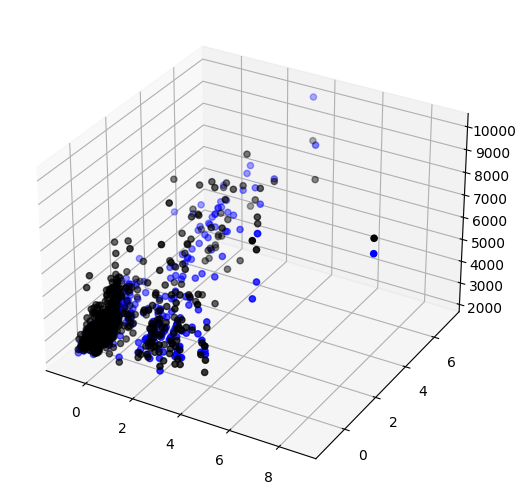

In [67]:
# Predicted values of y based upon the model
y_pred = MLR.predict(X_test)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0],X_test[:,1], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,1], y_pred,  color='blue')
pyplot.show()

## K Nearest Neighbors: Select, Instantiate, Fit, Score


In [68]:
## Select/Import the Model.
from sklearn.neighbors import KNeighborsRegressor
    
## Instantiate the Knn model with ... neighbors. 
KNN = KNeighborsRegressor(n_neighbors=9)
    
## Fit the model on the training data.
KNN.fit(X_train, y_train)
    
## See how the model performs on the test data.
KNN.score(X_test, y_test)


0.6997580294575194

###K Nearest Neighbors: Evaluate ... ScatterPlots

/var/folders/zy/r1jhkv7x6hs6qyxph0rcr7wh0000gn/T/ipykernel_55109/904511297.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


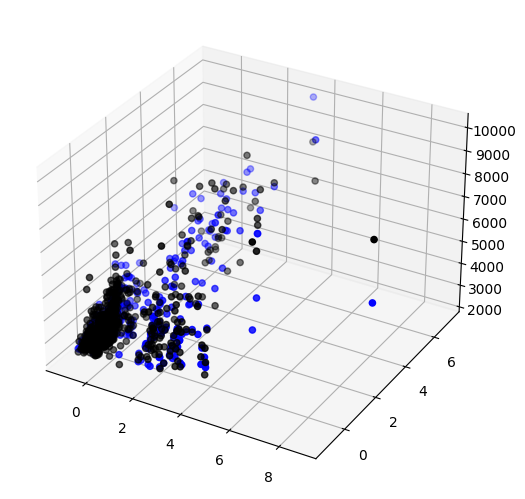

In [69]:
# Predicted values of y based upon the model
y_pred = KNN.predict(X_test)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0],X_test[:,1], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,1], y_pred,  color='blue')
pyplot.show()

##Random Forest: Select, Instantiate, Fit, Score

In [70]:
## Select/Import the Model.
from sklearn.ensemble import RandomForestRegressor

## Instantiate the Random Forest model
RF = RandomForestRegressor(n_estimators=19)

## Fit the model on the training data.
RF.fit(X_train, y_train)

## See how the model performs on the test data.
print(RF.score(X_test, y_test))

0.6836294860934002


### Random Forest: Evaluate ... ScatterPlots

/var/folders/zy/r1jhkv7x6hs6qyxph0rcr7wh0000gn/T/ipykernel_55109/1785004186.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


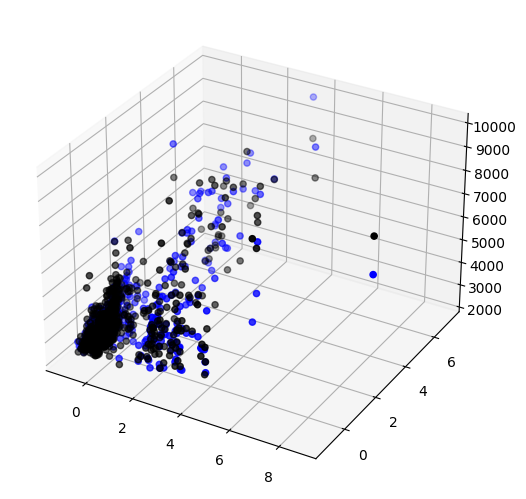

In [71]:
# Predicted values of y based upon the model
y_pred = RF.predict(X_test)

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(X_test[:,0],X_test[:,1], y_test,  color='black')
ax.scatter(X_test[:,0],X_test[:,1], y_pred,  color='blue')
pyplot.show()

'#6' 
## (Remember to return to step #4 to complete this section.)
### Record the model scores for each of your property sizes:

            Small, Medium, Large, XLarge
MLReg:      0.32196, 0.14819, 0.16018, 0.68786


KNN:        0.71500, 0.37408, 0.43820, 0.69975                     


RForest:    0.73145, 0.35592, 0.39033, 0.69091                       

'#7'

Were your expectations met (from your previous conjectures)?
No. Although XL performed consistently good in all the algorithms, Small performed best in RForest.

What are your thoughts about the differences in scores across the property sizes?
Small property sizes must have clustered data.

What are your thoughts about the differences in scores across the various models?
Different models have different methods of regression. Different models perform differently depending on the nature of the dataset.

### Let's move on to consider the **Classification** models. We will again use the features 'LAND' and 'IMPR', but this time our target will be 'SMLXL'.

---



### 1) Choose the Features and a Target for your problem.

In [72]:
# Define the features and the target from our dataset.
# Note that based upon the quantitive data that is given,
# We will try to predict the 'SMLXL' of a property.

# Features
X = houses_2017[['LAND','IMPR']]

# Target
y = houses_2017['SMLXL']

### 2) Create Training and Testing sets

In [73]:
# import the package to create the Training and Testing split.
from sklearn.model_selection import train_test_split

# The code below splits our X and y into training and testing sets. 
# Since test_size=0.30, the split will be 70% Training to 30% Testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

### 3) Feature Scaling

In [74]:
# We now transform our feature values to the number
# of Standard Deviations each value is from its mean.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[-0.46069736, -0.45771325],
       [-0.38920648, -0.17479187],
       [ 5.31219117, 11.60219905],
       [ 0.05761151,  0.41157045],
       [-0.35346104, -0.18847159]])

## K Nearest Neighbors: Select, Instantiate, Fit, Score


In [75]:
## Select/Import the Model.
from sklearn.neighbors import KNeighborsClassifier
    
## Instantiate the Knn model with ... neighbors. 
KNN = KNeighborsClassifier(n_neighbors=7)
    
## Fit the model on the training data.
KNN.fit(X_train, y_train)
    
## See how the model performs on the test data.
KNN.score(X_test, y_test)


0.7528800542127851

###K Nearest Neighbors: Evaluate ... Classification Report

In [76]:
# Predicted values of y based upon the model
y_pred = KNN.predict(X_test)

# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report  

# The classification report compares what was predicted for the test set  
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1069
           1       0.69      0.66      0.67      1173
           2       0.69      0.71      0.70      1092
           3       0.88      0.83      0.85      1093

    accuracy                           0.75      4427
   macro avg       0.76      0.76      0.75      4427
weighted avg       0.75      0.75      0.75      4427



##Random Forest: Select, Instantiate, Fit, Score

In [77]:
## Select/Import the Model.
from sklearn.ensemble import RandomForestClassifier

## Instantiate the Random Forest model
RF = RandomForestClassifier(n_estimators=10)

## Fit the model on the training data.
RF.fit(X_train, y_train)

## See how the model performs on the test data.
print(RF.score(X_test, y_test))

0.7463293426699796


### Random Forest: Evaluate ... Classification Report




In [78]:
# Predicted values of y based upon the model
y_pred = RF.predict(X_test)

# The classification report shows how well the model performed on each possible outcome
# or CityNum in our case.
from sklearn.metrics import classification_report  

# The classification report compares what was predicted for the test set  
# against what was actually seen in the test set.
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1069
           1       0.68      0.66      0.67      1173
           2       0.69      0.68      0.68      1092
           3       0.86      0.84      0.85      1093

    accuracy                           0.75      4427
   macro avg       0.75      0.75      0.75      4427
weighted avg       0.75      0.75      0.75      4427



'#8'
### Notice the f1-score for each of the property sizes 0-3 in the Classification Reports for our two models. Do you notice any similarities from what you found in the regression model results?

Explain.
Yes, S and XL performed better in regression tests. They also have better f1 scores for the classification models.
